## Pipelining
Data Importing and Cleaning -> Message Preprocessing -> Label Encoding -> Embeddings from Multilingual Model -> Using TPOT to find best Pipeline -> Prediction

In [ ]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt


## Reading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/spam/spam.csv'
df=pd.read_csv(file_path,encoding="Latin-1")
df = df[['v1','v2']]
df.set_axis(['Label', 'Message'], axis=1, inplace=True)

<ipython-input-3-694c8fc427a8>:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(['Label', 'Message'], axis=1, inplace=True)


### Exploring the data

In [ ]:
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.Label.unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
df.isnull().sum() ## checking for null values

Label      0
Message    0
dtype: int64

<Axes: xlabel='Label', ylabel='count'>

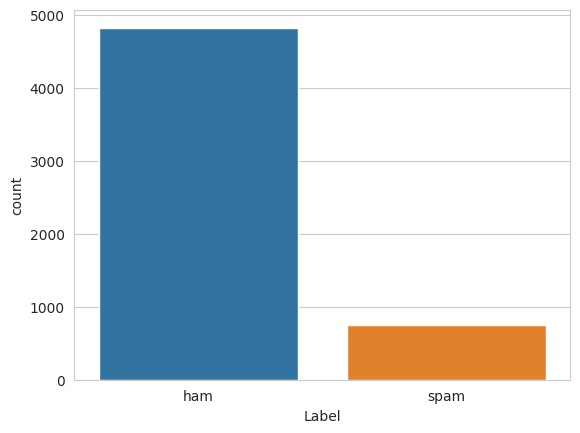

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Label',data=df)

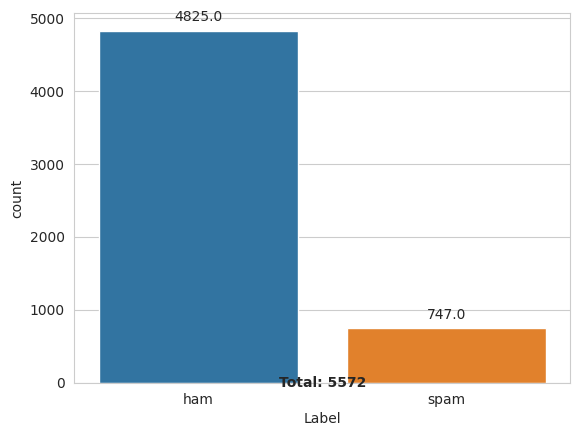

In [ ]:

# Assuming df is your DataFrame with the 'Label' column
sns.set_style('whitegrid')
ax = sns.countplot(x='Label', data=df)

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add total count annotation below "Label" bars
total_count = len(df)
ax.annotate(f'Total: {total_count}', (0.5, -0.3), ha='center', va='center', xytext=(0, 0), textcoords='offset points', fontweight='bold')

plt.show()


### Preprocessing the data

In [ ]:
def preprocessing(text):
    #Changing text to lowercase ,removing extra spaces and cleaning the text.
    text= text.lower().strip()

    text=re.sub('[^a-zA-Z]',' ',text)

    text=re.sub(' +', ' ', text)
    return text

In [ ]:
df['Message']=df['Message'].apply(preprocessing)

In [ ]:
df.head()

,Label,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final ...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...


In [ ]:
#Encoding 0 for ham and 1 for Spam
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE=LabelEncoder()
LE.fit(df["Label"])

LabelEncoder()

In [ ]:
df["Label"]=LE.transform(df["Label"])

In [ ]:
df

,Label,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final ...
3,0,u dun say so early hor u c already then say
4,0,nah i don t think he goes to usf he lives arou...
...,...,...
5567,1,this is the nd time we have tried contact u u ...
5568,0,will b going to esplanade fr home
5569,0,pity was in mood for that so any other suggest...
5570,0,the guy did some bitching but i acted like i d...


<Axes: xlabel='Label', ylabel='count'>

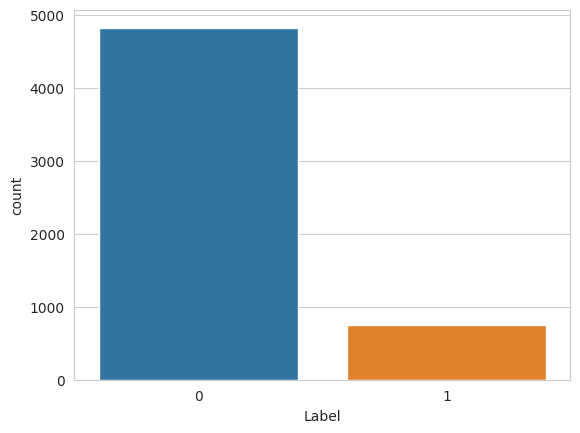

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Label',data=df)

### Converting messages to Embeddings

In [ ]:
%pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.4 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=6c50a1b0d7a12c8208492f52a1090b0db796f9337d6367109ebad801a8389a37
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
Encoder = SentenceTransformer('distiluse-base-multilingual-cased') # import the same model

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

rust_model.ot:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/539M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/528 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

In [ ]:
embeddings=Encoder.encode(df["Message"]) # Encode text into vectors

In [ ]:
len(embeddings)

5572

In [ ]:
embeddings[0]

array([ 5.34283295e-02, -2.38687042e-02,  4.93409578e-03, -6.96249492e-03,
        3.27754393e-02, -3.98076475e-02,  3.84434476e-03,  3.42427823e-03,
        1.63584165e-02,  3.99501957e-02,  4.18882119e-03,  3.01990099e-02,
       -1.37331309e-02,  2.19427478e-02,  4.93108388e-03, -3.27372625e-02,
        2.75634229e-02, -1.84480450e-03,  2.53685866e-03, -1.72956455e-02,
       -1.71510708e-02, -5.77044580e-03, -4.12951186e-02, -1.90557223e-02,
        2.66342666e-02, -8.71310476e-03, -2.96995379e-02,  5.02164476e-02,
        5.08540729e-03, -1.32683851e-02,  2.16075927e-02,  3.18136886e-02,
        8.75917729e-03, -1.41988182e-02,  3.90085089e-03, -6.08928055e-02,
        2.03155521e-02,  1.59705225e-02, -2.88936216e-02,  2.37819217e-02,
        6.89186971e-04,  1.86952762e-02,  3.14723589e-02,  3.59244645e-02,
        9.19888541e-02,  1.74739268e-02,  1.05361296e-02,  4.61966702e-04,
       -3.89837697e-02,  2.68827402e-03,  3.12510021e-02, -4.11910005e-05,
        9.66116879e-03,  

In [ ]:
print(embeddings[0].shape)

(512,)


## Preparing the train and test data

In [ ]:
x=embeddings
y=df["Label"].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
print("Training set of X and y-->",len(X_train),len(y_train))
print("Test set of X and y-->",len(X_test),len(y_test))

Training set of X and y--> 4457 4457
Test set of X and y--> 1115 1115


## Apply Classification algorithm

TPOT

In [ ]:
%pip install tpot

In [ ]:
from tpot import TPOTClassifier


In [ ]:
tpot = TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

In [ ]:
tpot.fit(X_train, y_train)
accuracy = tpot.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9856391518573879

Generation 2 - Current best internal CV score: 0.9856391518573879

Generation 3 - Current best internal CV score: 0.9856391518573879

Generation 4 - Current best internal CV score: 0.9856391518573879

Generation 5 - Current best internal CV score: 0.9885557115751435

Best pipeline: MLPClassifier(StandardScaler(input_matrix), alpha=0.0001, learning_rate_init=0.001)
Accuracy: 0.9874439461883409


### Confusion Matrix


In [ ]:
y_pred = tpot.predict(X_test)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[962   3]
 [ 11 139]]


## Visualize the Confusion matrix

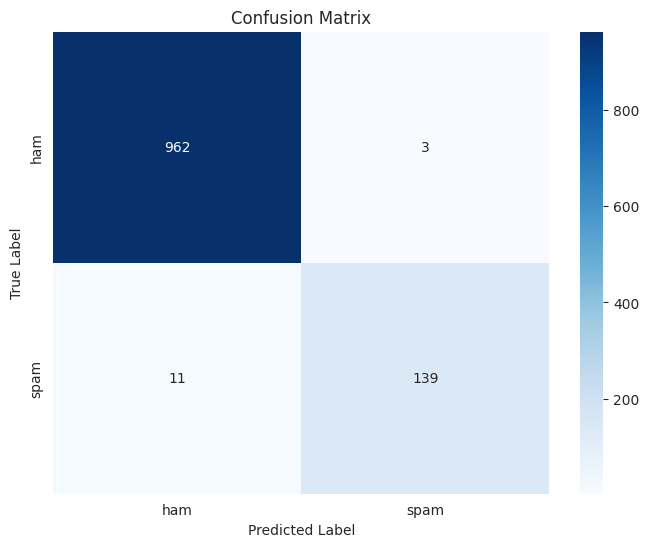

In [ ]:
class_labels = ["ham", "spam"]
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Classification Report

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
y_pred = tpot.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       965
        spam       0.98      0.93      0.95       150

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



## Predicting for new input

In [ ]:
# We have trained our model 0 for ham and 1 for Spam
def prediction(predict_text):
    predict_data=Encoder.encode([predict_text])
    if tpot.predict(predict_data)[0]>0:
        return "Spam"
    else:
        return "Ham"

In [ ]:
prediction("Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16")

'Spam'

In [ ]:
prediction("आपको 500 सीडी वाउचर या 125 उपहार की गारंटी के साथ बधाई और मुफ्त प्रवेश 2 100 साप्ताहिक ड्रा टीएक्सटी म्यूजिक से 87066 टीएनसीएस www.Ldew.com1win150ppmx3age16")

'Spam'

In [ ]:
prediction("તમને 500 CD વાઉચર અથવા 125 ગિફ્ટ ગેરંટી અને ફ્રી એન્ટ્રી 87066 TnCs પર 100 અઠવાડિયામાં ડ્રો txt MUSIC આપવા બદલ અભિનંદન www.Ldew.com1win150ppmx3age16")

'Spam'